In [2]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import s3fs
%matplotlib inline

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(source_id=['CNRM-ESM2-1'], activity_id = ['CMIP']
                 , experiment_id=['historical'], table_id=['Ofx']
                 , variable_id=['areacello']
                 , member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [4]:
ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
areacello = ds_dict[list(ds_dict.keys())[0]]
areacello = areacello.squeeze()
areacello

<xarray.Dataset>
Dimensions:     (y: 294, x: 362, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(294, 362), meta=np.ndarray>
Attributes: (12/56)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    xios_commit:             1442-shuffle
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/4e2f1651-782d-48b3-ba43-287dd16d7fe8
    version_id:              v20181206
    intake_esm_varname:      ['areacello']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

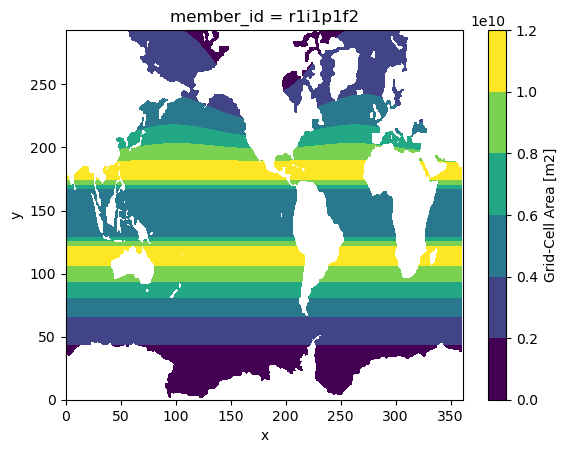

In [6]:
areacello.areacello.plot.contourf()

### choosing Greenland area

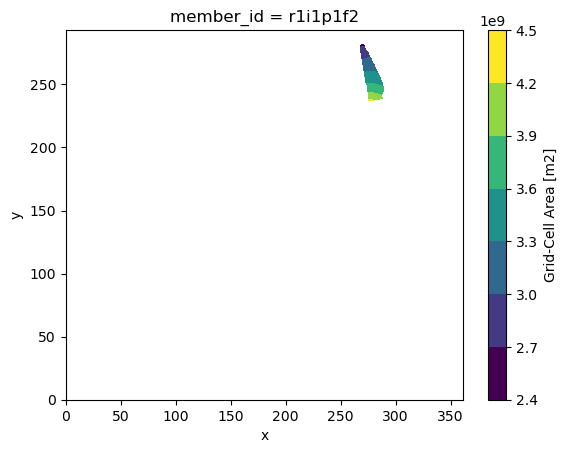

In [8]:
GLarea = areacello.areacello.where((areacello.lat>=60) 
                                   & (areacello.lat<=85) 
                                   & (areacello.lon <= 10)  
                                   & (areacello.lon >= -10))
GLarea.plot.contourf()

In [9]:
GLarea

<xarray.DataArray 'areacello' (y: 294, x: 362)>
dask.array<where, shape=(294, 362), dtype=float32, chunksize=(294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_methods:      area: sum
    description:       Cell areas for any grid used to report ocean variables...
    history:           none
    long_name:         Grid-Cell Area
    online_operation:  once
    standard_name:     cell_area
    units:             m2

### getting the CMIP DMS data from CNRM model

In [10]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id=['dmso'],experiment_id=['historical'])
#cat = col.search(variable_id=['emidms'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [11]:
cat = col.search(variable_id=['dmso'],source_id=['CNRM-ESM2-1'],
 activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'] 
#                  ,member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [12]:
dmsset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [13]:
list(dmsset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [13]:
dmsset = dmsset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
dmsset = dmsset.isel(lev=0).squeeze()
dmsset

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

### Averaging over the GL area

In [ ]:
#BSarea = areacello.areacello.where((areacello.latitude>=65.9) & (areacello.latitude<=81.9) & (areacello.longitude <= 68.6)  & (areacello.longitude >= 16.6))
#BSarea.plot.contourf()
#BSsst = da.where((da.latitude>=65.9) & (da.latitude<=81.9) & (da.longitude <= 68.6)  & (da.longitude >= 16.6))
#BSsst.mean(dim='year').plot.contourf()
#BSsst = (BSarea*BSsst).sum(dim=('i','j'))/BSarea.sum(dim=('i','j'))

In [15]:
dmsset_GL = dmsset.where((dmsset.lat>=70) 
                       & (dmsset.lat<=85) 
                       & (dmsset.lon <= 10)  
                       & (dmsset.lon >= -10))
dmsset_GL

<xarray.Dataset>
Dimensions:      (time: 1980, y: 294, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

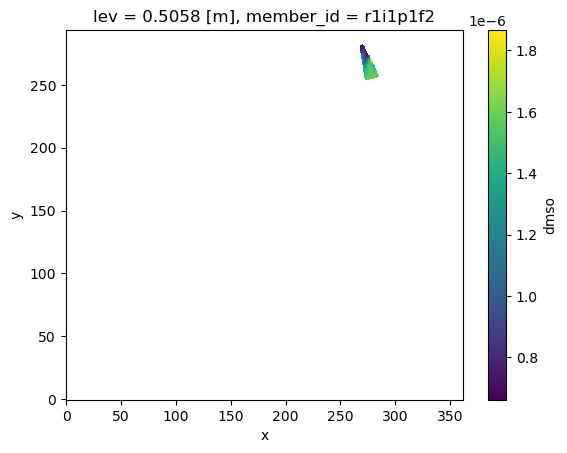

In [16]:
dmsset_GL['dmso'].mean(dim='time').plot.pcolormesh()

In [27]:
dmsset_GL['dmso']


<xarray.DataArray 'dmso' (time: 1980, y: 294, x: 362)>
dask.array<where, shape=(1980, 294, 362), dtype=float32, chunksize=(4, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev        float64 0.5058
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    units:               mol m-3

In [29]:
GL_month_dmsset_AreaMean = (GLarea*dmsset_GL['dmso']
                               ).sum(dim=('x','y'))/GLarea.sum(dim=('x','y')
                              ,keep_attrs=True)
GL_month_dmsset_AreaMean

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(4,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
    lev        float64 0.5058
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00

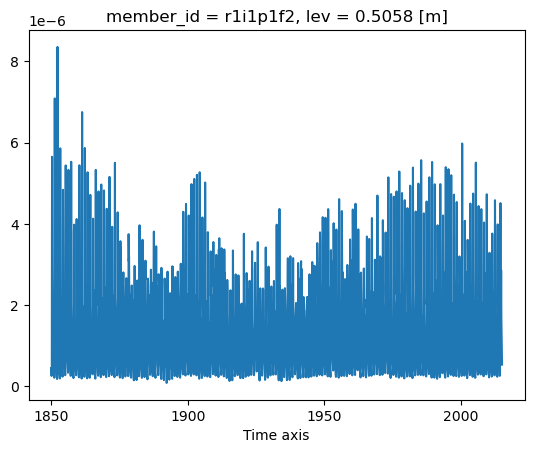

In [30]:
GL_month_dmsset_AreaMean.plot(x='time')

In [1]:
GL_month_dmsset_AreaMean_April=GL_month_dmsset_AreaMean.groupby('time.month')#[4]
GL_month_dmsset_AreaMean_April

NameError: name 'GL_month_dmsset_AreaMean' is not defined

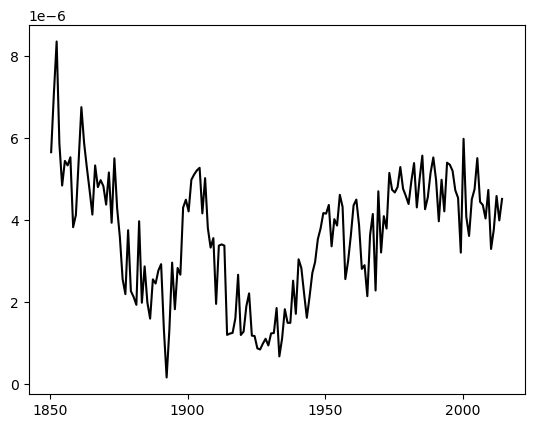

In [43]:
plt_avrg=plt.plot(GL_month_dmsset_AreaMean_April.time,GL_month_dmsset_AreaMean_April, color='black')